In [1]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pypi

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


Import Libraries

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from fbprophet import Prophet

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
import os

In [8]:
pwd

'C:\\Users\\470593'

In [9]:
data=pd.read_csv(r'C:\Users\470593\Desktop\day.csv')

In [10]:
data.shape

(731, 16)

In [11]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,Nil,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,Nil,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,Nil,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,Nil,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,Nil,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


UNIVARIATE ANALYSIS

In [12]:
df = data[['dteday', 'cnt']].dropna()

In [13]:
df['date_index'] = df['dteday']

In [14]:
df['date_index'] = pd.to_datetime(df['date_index'])
df

,dteday,cnt,date_index
0,1/1/2011,985,2011-01-01
1,1/2/2011,801,2011-01-02
2,1/3/2011,1349,2011-01-03
3,1/4/2011,1562,2011-01-04
4,1/5/2011,1600,2011-01-05
...,...,...,...
726,12/27/2012,2114,2012-12-27
727,12/28/2012,3095,2012-12-28
728,12/29/2012,1341,2012-12-29
729,12/30/2012,1796,2012-12-30


In [15]:
df = df.set_index('date_index')
df

,dteday,cnt
date_index,,
2011-01-01,1/1/2011,985
2011-01-02,1/2/2011,801
2011-01-03,1/3/2011,1349
2011-01-04,1/4/2011,1562
2011-01-05,1/5/2011,1600
...,...,...
2012-12-27,12/27/2012,2114
2012-12-28,12/28/2012,3095
2012-12-29,12/29/2012,1341


In [16]:
df.rename(columns={'dteday':'ds'},inplace=True)
df.rename(columns={'cnt':'y'},inplace=True)
df

,ds,y
date_index,,
2011-01-01,1/1/2011,985
2011-01-02,1/2/2011,801
2011-01-03,1/3/2011,1349
2011-01-04,1/4/2011,1562
2011-01-05,1/5/2011,1600
...,...,...
2012-12-27,12/27/2012,2114
2012-12-28,12/28/2012,3095
2012-12-29,12/29/2012,1341


In [17]:
ny = pd.DataFrame({'holiday': "New Year's Day", 'ds': pd.to_datetime(['2012-01-01'])}) 
mlk = pd.DataFrame({'holiday': 'Birthday of Martin Luther King, Jr.', 'ds' : pd.to_datetime(['2011-01-17', '2012-01-16'])}) 
Pres = pd.DataFrame({'holiday': "President's Day", 'ds' : pd.to_datetime(['2011-02-21', '2012-02-20'])})
mem = pd.DataFrame({'holiday': 'Memorial Day', 'ds' : pd.to_datetime([ '2012-05-28'])})
ind = pd.DataFrame({'holiday': 'Independence Day', 'ds' : pd.to_datetime(['2012-07-04', '2011-07-04'])})
lab = pd.DataFrame({'holiday': 'Labor Day', 'ds' : pd.to_datetime(['2012-09-03', '2011-09-05'])})
col = pd.DataFrame({'holiday': 'Columbus Day', 'ds' : pd.to_datetime(['2011-10-10', '2012-10-08'])})
vet = pd.DataFrame({'holiday': "Veteran's Day", 'ds' : pd.to_datetime(['2011-11-11', '2012-11-12'])})
thanks = pd.DataFrame({'holiday': 'Thanksgiving Day', 'ds' : pd.to_datetime(['2011-11-24', '2012-11-22'])})
christ = pd.DataFrame({'holiday': 'Christmas', 'ds' : pd.to_datetime(['2012-12-25', '2011-12-26'])})
eman = pd.DataFrame({'holiday': 'emanicipation Day', 'ds' : pd.to_datetime(['2011-04-15','2012-04-16'])})

holidays = pd.concat([ny, mlk, Pres, mem, ind, lab, col, vet, thanks, christ, eman])


In [18]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [19]:
import logging

logging.getLogger().setLevel(logging.ERROR)

In [20]:
prophet = Prophet(
    growth='linear',
    seasonality_mode='additive',
holidays=holidays)

In [21]:
prophet.fit(df)

In [22]:
#creating the future dates that prophet will predict
#specified frequency is in days since we have now daily data
future = prophet.make_future_dataframe(freq='D', periods=10)
future.tail()

,ds
736,2013-01-06
737,2013-01-07
738,2013-01-08
739,2013-01-09
740,2013-01-10


In [23]:
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper','additive_terms','additive_terms_lower','additive_terms_upper','trend_lower','trend_upper',]].tail()

,ds,yhat,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,trend_lower,trend_upper
736,2013-01-06,4263.343490,3122.307220,5502.349495,-2238.737483,-2238.737483,-2238.737483,6502.080973,6502.080973
737,2013-01-07,4493.223552,3250.510244,5701.569269,-2013.428445,-2013.428445,-2013.428445,6506.649839,6506.658095
738,2013-01-08,4731.420953,3519.440950,5963.060926,-1779.802068,-1779.802068,-1779.802068,6511.193045,6511.268266
739,2013-01-09,4823.647645,3584.923311,5930.538902,-1692.146401,-1692.146401,-1692.146401,6515.716588,6515.865050
740,2013-01-10,5081.848518,3935.085271,6293.594116,-1438.516552,-1438.516552,-1438.516552,6520.249492,6520.484785


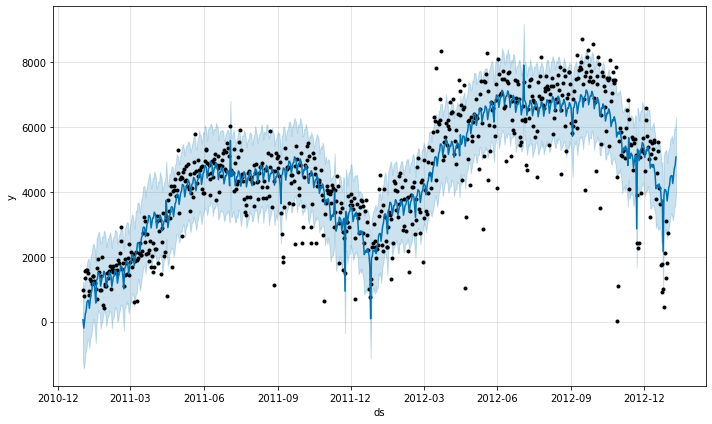

In [24]:
fig1 = prophet.plot(forecast)
fig1.savefig('forecastskuQty.png')

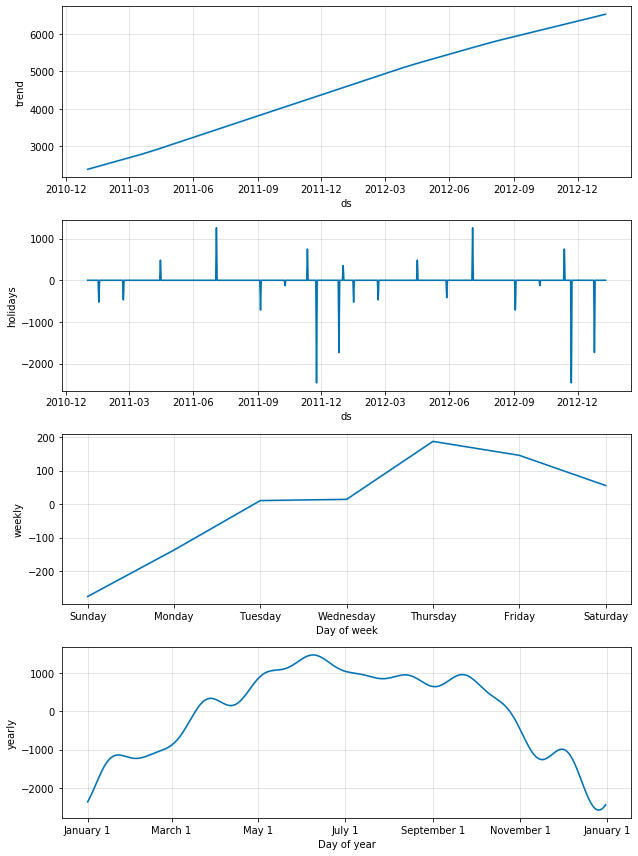

In [25]:
fig2 = prophet.plot_components(forecast)
fig2.savefig('forecastComponentsskuQty.png')

In [76]:
# horizon of 30 days, starting with 500 days of training data in the first cutoff and then making predictions every 90 days
df_cv = cross_validation(prophet,initial='500 days',period='90days',horizon='30days')
print (df_cv)

           ds         yhat   yhat_lower   yhat_upper     y     cutoff
0  2012-06-05  6968.573112  5924.665466  8027.162405  7001 2012-06-04
1  2012-06-06  6780.610964  5747.704331  7858.443602  7055 2012-06-04
2  2012-06-07  7038.904629  5970.770273  8051.673807  7494 2012-06-04
3  2012-06-08  7051.706274  6042.730991  8142.522559  7736 2012-06-04
4  2012-06-09  6996.332974  5861.065941  8053.368901  7498 2012-06-04
..        ...          ...          ...          ...   ...        ...
85 2012-12-27  5229.681562  4092.258698  6418.615078  2114 2012-12-01
86 2012-12-28  5209.060566  4071.381422  6354.834037  3095 2012-12-01
87 2012-12-29  5166.448921  4019.890018  6339.098233  1341 2012-12-01
88 2012-12-30  4889.165001  3805.442579  6076.538706  1796 2012-12-01
89 2012-12-31  5005.633956  3753.783737  6198.411849  2729 2012-12-01

[90 rows x 6 columns]


In [77]:
performance_metrics_results = performance_metrics(df_cv)
print (performance_metrics_results)

   horizon           mse         rmse          mae      mape  coverage
0   3 days  4.747475e+05   689.019231   551.225817  0.085420  0.888889
1   4 days  5.426873e+05   736.673106   646.461339  0.096609  0.888889
2   5 days  5.193199e+05   720.638553   623.335891  0.089696  0.888889
3   6 days  2.685625e+05   518.230127   453.251130  0.068413  1.000000
4   7 days  6.444749e+05   802.791965   564.850772  0.079606  0.888889
5   8 days  1.471854e+06  1213.199915   949.884760  0.179912  0.555556
6   9 days  1.649538e+06  1284.343308  1058.012194  0.190047  0.444444
7  10 days  1.453454e+06  1205.592836  1015.600838  0.186238  0.444444
8  11 days  6.921470e+05   831.953713   678.944223  0.092455  0.666667
9  12 days  7.566562e+05   869.859862   716.245467  0.096703  0.666667
10 13 days  1.055016e+06  1027.139571   778.300900  0.101295  0.666667
11 14 days  1.354245e+06  1163.720286   891.207669  0.129816  0.666667
12 15 days  1.218515e+06  1103.863669   827.638343  0.137478  0.777778
13 16 

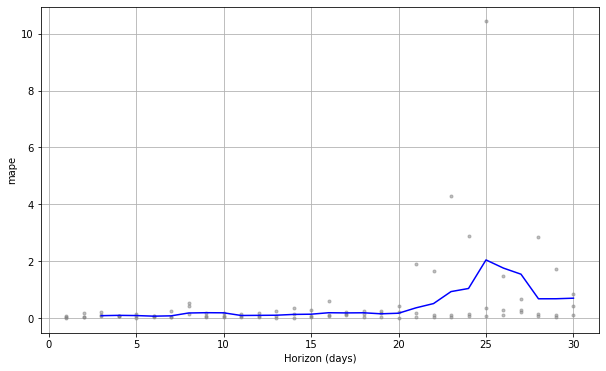

In [78]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='mape')

MULTIVARIATE ANALYSIS

In [29]:
df2 = data[['dteday', 'cnt','temp']].dropna()

In [30]:
df2['date_index'] = df2['dteday']

In [31]:
df2['date_index'] = pd.to_datetime(df2['date_index'])
df2

,dteday,cnt,temp,date_index
0,1/1/2011,985,0.344167,2011-01-01
1,1/2/2011,801,0.363478,2011-01-02
2,1/3/2011,1349,0.196364,2011-01-03
3,1/4/2011,1562,0.200000,2011-01-04
4,1/5/2011,1600,0.226957,2011-01-05
...,...,...,...,...
726,12/27/2012,2114,0.254167,2012-12-27
727,12/28/2012,3095,0.253333,2012-12-28
728,12/29/2012,1341,0.253333,2012-12-29
729,12/30/2012,1796,0.255833,2012-12-30


In [32]:
df2 = df2.set_index('date_index')
df2

,dteday,cnt,temp
date_index,,,
2011-01-01,1/1/2011,985,0.344167
2011-01-02,1/2/2011,801,0.363478
2011-01-03,1/3/2011,1349,0.196364
2011-01-04,1/4/2011,1562,0.200000
2011-01-05,1/5/2011,1600,0.226957
...,...,...,...
2012-12-27,12/27/2012,2114,0.254167
2012-12-28,12/28/2012,3095,0.253333
2012-12-29,12/29/2012,1341,0.253333


In [33]:
t = 13
min_t = -8
max_t = 39
n_t = (t - min_t)/(max_t - min_t)
print(n_t)
future_range = pd.date_range('2013-01-01', periods=10, freq='D')
future_temp_df = pd.DataFrame({ 'future_date': future_range, 'future_temp' : 0})
future_temp_df['future_date'] = pd.to_datetime(future_temp_df['future_date'])
future_temp_df = future_temp_df.set_index('future_date')
future_temp_df.at['2013-01-01', 'future_temp'] = 0.319148
future_temp_df.at['2013-01-02', 'future_temp'] = 0.255319
future_temp_df.at['2013-01-03', 'future_temp'] = 0.234042
future_temp_df.at['2013-01-04', 'future_temp'] = 0.319148
future_temp_df.at['2013-01-05', 'future_temp'] = 0.340425
future_temp_df.at['2013-01-06', 'future_temp'] = 0.404255
future_temp_df.at['2013-01-07', 'future_temp'] = 0.361702
future_temp_df.at['2013-01-08', 'future_temp'] = 0.404255
future_temp_df.at['2013-01-09', 'future_temp'] = 0.425531
future_temp_df.at['2013-01-10', 'future_temp'] = 0.446808
future_temp_df.tail(10)

0.44680851063829785


,future_temp
future_date,
2013-01-01,0.319148
2013-01-02,0.255319
2013-01-03,0.234042
2013-01-04,0.319148
2013-01-05,0.340425
2013-01-06,0.404255
2013-01-07,0.361702
2013-01-08,0.404255
2013-01-09,0.425531


In [34]:
def weather_temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df2[date:].empty:
        return future_temp_df[date:]['future_temp'].values[0]
    else:
        return (df2[date:]['temp']).values[0]
    
    return 0

In [35]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [36]:
import logging

logging.getLogger().setLevel(logging.ERROR)

In [37]:
ny = pd.DataFrame({'holiday': "New Year's Day", 'ds': pd.to_datetime(['2012-01-01'])}) 
mlk = pd.DataFrame({'holiday': 'Birthday of Martin Luther King, Jr.', 'ds' : pd.to_datetime(['2011-01-17', '2012-01-16'])}) 
Pres = pd.DataFrame({'holiday': "President's Day", 'ds' : pd.to_datetime(['2011-02-21', '2012-02-20'])})
mem = pd.DataFrame({'holiday': 'Memorial Day', 'ds' : pd.to_datetime([ '2012-05-28'])})
ind = pd.DataFrame({'holiday': 'Independence Day', 'ds' : pd.to_datetime(['2012-07-04', '2011-07-04'])})
lab = pd.DataFrame({'holiday': 'Labor Day', 'ds' : pd.to_datetime(['2012-09-03', '2011-09-05'])})
col = pd.DataFrame({'holiday': 'Columbus Day', 'ds' : pd.to_datetime(['2011-10-10', '2012-10-08'])})
vet = pd.DataFrame({'holiday': "Veteran's Day", 'ds' : pd.to_datetime(['2011-11-11', '2012-11-12'])})
thanks = pd.DataFrame({'holiday': 'Thanksgiving Day', 'ds' : pd.to_datetime(['2011-11-24', '2012-11-22'])})
christ = pd.DataFrame({'holiday': 'Christmas', 'ds' : pd.to_datetime(['2012-12-25', '2011-12-26'])})
eman = pd.DataFrame({'holiday': 'emanicipation Day', 'ds' : pd.to_datetime(['2011-04-15','2012-04-16'])})

holidays = pd.concat([ny, mlk, Pres, mem, ind, lab, col, vet, thanks, christ, eman])

In [38]:
prophetone = Prophet(
    growth='linear',
    seasonality_mode='additive',
holidays=holidays)

In [39]:
prophetone.add_regressor('temp', prior_scale=0.5, mode='additive')

In [40]:
df2.rename(columns={'dteday':'ds'},inplace=True)
df2.rename(columns={'cnt':'y'},inplace=True)

In [41]:
prophetone.fit(df2)

In [42]:
future = prophetone.make_future_dataframe(periods=10)
future['temp'] = future['ds'].apply(weather_temp)


In [43]:
forecast = prophetone.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,"Birthday of Martin Luther King, Jr.","Birthday of Martin Luther King, Jr._lower","Birthday of Martin Luther King, Jr._upper",Christmas,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,2559.614664,-566.452441,1685.585313,2559.614664,2559.614664,0.0,0.0,0.0,0.0,...,106.682802,106.682802,106.682802,-1455.180895,-1455.180895,-1455.180895,0.0,0.0,0.0,555.241951
1,2011-01-02,2564.340782,-784.751364,1574.302500,2564.340782,2564.340782,0.0,0.0,0.0,0.0,...,-228.130636,-228.130636,-228.130636,-1371.210776,-1371.210776,-1371.210776,0.0,0.0,0.0,392.882057
2,2011-01-03,2569.066899,-1312.452432,1008.500929,2569.066899,2569.066899,0.0,0.0,0.0,0.0,...,-132.020445,-132.020445,-132.020445,-1279.194664,-1279.194664,-1279.194664,0.0,0.0,0.0,-139.086540
3,2011-01-04,2573.793017,-1052.792549,1294.131740,2573.793017,2573.793017,0.0,0.0,0.0,0.0,...,-26.010432,-26.010432,-26.010432,-1180.753985,-1180.753985,-1180.753985,0.0,0.0,0.0,85.860637
4,2011-01-05,2578.519135,-902.886061,1465.804614,2578.519135,2578.519135,0.0,0.0,0.0,0.0,...,-22.366746,-22.366746,-22.366746,-1077.610452,-1077.610452,-1077.610452,0.0,0.0,0.0,314.294161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2013-01-06,6498.053530,3803.177729,6140.703757,6498.053530,6498.053530,0.0,0.0,0.0,0.0,...,-228.130636,-228.130636,-228.130636,-917.981408,-917.981408,-917.981408,0.0,0.0,0.0,4956.685637
737,2013-01-07,6502.701003,3893.437530,6166.180352,6502.668485,6502.701003,0.0,0.0,0.0,0.0,...,-132.020445,-132.020445,-132.020445,-810.906675,-810.906675,-810.906675,0.0,0.0,0.0,4979.953552
738,2013-01-08,6507.348475,4163.858261,6511.885425,6507.271294,6507.348475,0.0,0.0,0.0,0.0,...,-26.010432,-26.010432,-26.010432,-705.359373,-705.359373,-705.359373,0.0,0.0,0.0,5380.722821
739,2013-01-09,6511.995948,4405.196757,6754.914389,6511.853092,6512.041015,0.0,0.0,0.0,0.0,...,-22.366746,-22.366746,-22.366746,-603.011386,-603.011386,-603.011386,0.0,0.0,0.0,5583.642038


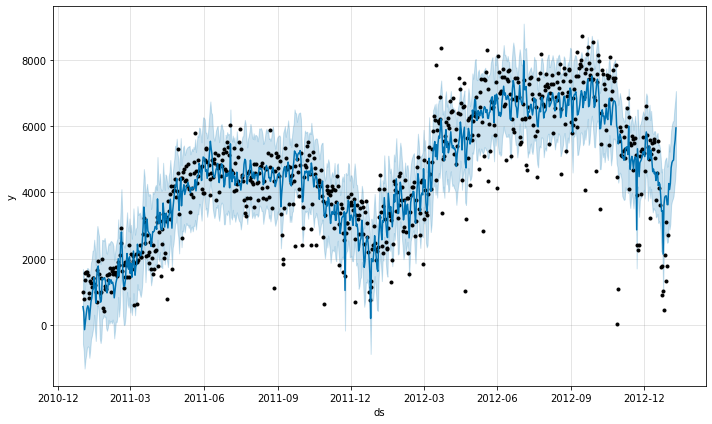

In [44]:
fig3= prophetone.plot(forecast)
fig3.savefig('forecastskuQtythree.png')

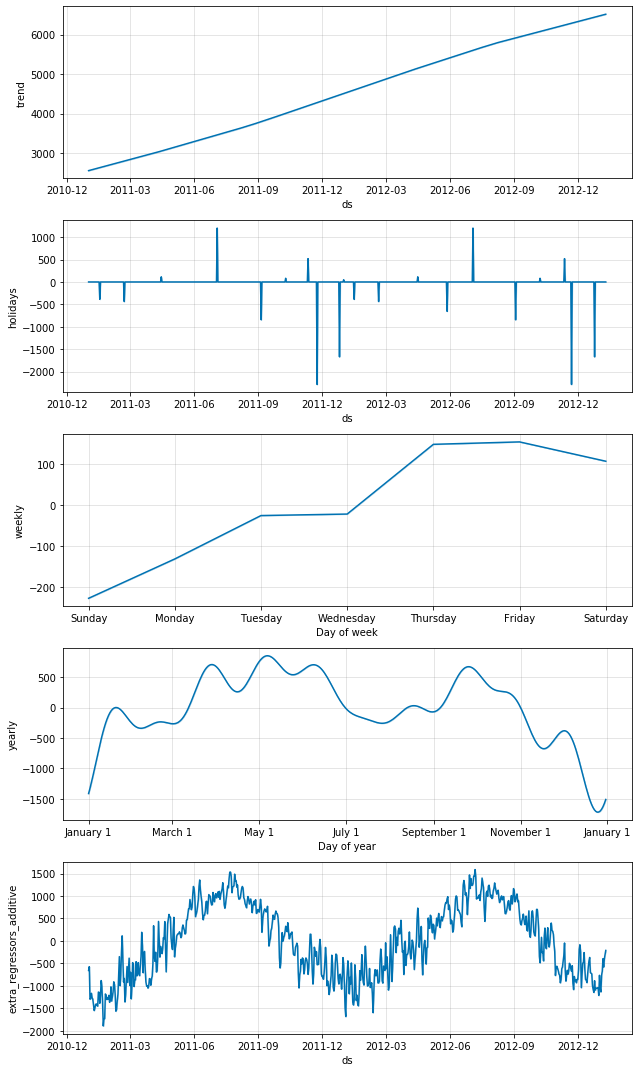

In [45]:
fig4 = prophetone.plot_components(forecast)


In [79]:
# horizon of 30 days, starting with 500 days of training data in the first cutoff and then making predictions every 90 days
df2_cv = cross_validation(prophetone,initial='500 days',period='90days',horizon='30days')
print (df2_cv)

           ds         yhat   yhat_lower   yhat_upper     y     cutoff
0  2012-06-05  6129.852841  5185.640138  7151.870854  7001 2012-06-04
1  2012-06-06  6001.289559  4965.686206  6976.332812  7055 2012-06-04
2  2012-06-07  6481.348938  5423.799369  7462.760797  7494 2012-06-04
3  2012-06-08  6773.103736  5793.713050  7779.192846  7736 2012-06-04
4  2012-06-09  7025.672544  5992.587195  8072.304293  7498 2012-06-04
..        ...          ...          ...          ...   ...        ...
85 2012-12-27  4941.693357  3840.392877  6103.869886  2114 2012-12-01
86 2012-12-28  4967.421294  3844.622068  6096.257112  3095 2012-12-01
87 2012-12-29  4976.747114  3857.488458  6109.641791  1341 2012-12-01
88 2012-12-30  4717.838967  3611.379252  6058.687574  1796 2012-12-01
89 2012-12-31  4654.228044  3517.491553  5770.938680  2729 2012-12-01

[90 rows x 6 columns]


In [80]:
performance_metrics_results = performance_metrics(df2_cv)
print (performance_metrics_results)

   horizon           mse         rmse          mae      mape  coverage
0   3 days  5.039172e+05   709.871273   644.679762  0.097370  0.777778
1   4 days  5.113694e+05   715.100976   627.979335  0.090022  0.777778
2   5 days  4.481977e+05   669.475656   592.292979  0.083586  0.888889
3   6 days  2.858293e+05   534.630039   464.202552  0.069766  1.000000
4   7 days  6.749160e+05   821.532735   566.065532  0.079869  0.888889
5   8 days  1.588470e+06  1260.345093   972.096843  0.185734  0.555556
6   9 days  1.907785e+06  1381.225771  1153.934343  0.206432  0.444444
7  10 days  1.751094e+06  1323.289168  1171.498739  0.211372  0.444444
8  11 days  1.019199e+06  1009.554088   868.600477  0.118370  0.666667
9  12 days  9.835565e+05   991.744148   856.195824  0.114997  0.555556
10 13 days  1.244079e+06  1115.382740   944.534778  0.125020  0.555556
11 14 days  1.254284e+06  1119.948036   948.380555  0.134919  0.444444
12 15 days  1.132879e+06  1064.367830   857.444956  0.142237  0.555556
13 16 

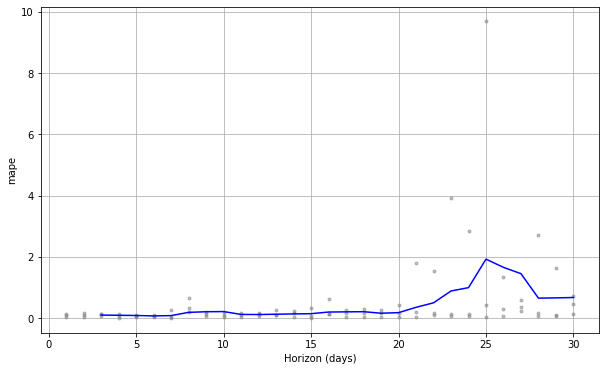

In [81]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df2_cv,metric='mape')

Multivariate analysis with two regressors

In [49]:
df3 = data[['dteday', 'cnt','temp','weathersit']].dropna()

In [50]:
df3['date_index'] = df3['dteday']

In [51]:
df3['date_index'] = pd.to_datetime(df3['date_index'])
df3

,dteday,cnt,temp,weathersit,date_index
0,1/1/2011,985,0.344167,2,2011-01-01
1,1/2/2011,801,0.363478,2,2011-01-02
2,1/3/2011,1349,0.196364,1,2011-01-03
3,1/4/2011,1562,0.200000,1,2011-01-04
4,1/5/2011,1600,0.226957,1,2011-01-05
...,...,...,...,...,...
726,12/27/2012,2114,0.254167,2,2012-12-27
727,12/28/2012,3095,0.253333,2,2012-12-28
728,12/29/2012,1341,0.253333,2,2012-12-29
729,12/30/2012,1796,0.255833,1,2012-12-30


In [52]:
df3 = df3.set_index('date_index')
df3

,dteday,cnt,temp,weathersit
date_index,,,,
2011-01-01,1/1/2011,985,0.344167,2
2011-01-02,1/2/2011,801,0.363478,2
2011-01-03,1/3/2011,1349,0.196364,1
2011-01-04,1/4/2011,1562,0.200000,1
2011-01-05,1/5/2011,1600,0.226957,1
...,...,...,...,...
2012-12-27,12/27/2012,2114,0.254167,2
2012-12-28,12/28/2012,3095,0.253333,2
2012-12-29,12/29/2012,1341,0.253333,2


In [53]:
weathersit=4
print('weathersit')
future_range = pd.date_range('2013-01-01', periods=10, freq='D')
future_weathersit_df = pd.DataFrame({ 'future_date': future_range, 'future_weathersit':1 })
future_weathersit_df['future_date'] = pd.to_datetime(future_weathersit_df['future_date'])
future_weathersit_df = future_weathersit_df.set_index('future_date')
future_weathersit_df.at['2013-01-01', 'future_weathersit'] = 4
future_weathersit_df.at['2013-01-02', 'future_weathersit'] = 4
future_weathersit_df.at['2013-01-03', 'future_weathersit'] = 4
future_weathersit_df.at['2013-01-04', 'future_weathersit'] = 4
future_weathersit_df.at['2013-01-05', 'future_weathersit'] = 4
future_weathersit_df.at['2013-01-06', 'future_weathersit'] = 4
future_weathersit_df.at['2013-01-07', 'future_weathersit'] = 4
future_weathersit_df.at['2013-01-08', 'future_weathersit'] = 4
future_weathersit_df.at['2013-01-09', 'future_weathersit'] = 4
future_weathersit_df.at['2013-01-10', 'future_weathersit'] = 4
future_weathersit_df.tail(10)

weathersit


,future_weathersit
future_date,
2013-01-01,4
2013-01-02,4
2013-01-03,4
2013-01-04,4
2013-01-05,4
2013-01-06,4
2013-01-07,4
2013-01-08,4
2013-01-09,4


In [54]:
def weather_temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df3[date:].empty:
        return future_temp_df[date:]['future_temp'].values[0]
    else:
        return (df3[date:]['temp']).values[0]
    
    return 0



In [55]:
def weather_condition(ds):
    date = (pd.to_datetime(ds)).date()
    
    if df3[date:].empty:
        return future_weathersit_df[date:]['future_weathersit'].values[0]
    else:
        return (df3[date:]['weathersit']).values[0]
    
    return 0

In [56]:
prophettwo = Prophet(
    growth='linear',
    seasonality_mode='additive',
holidays=holidays)

In [57]:
prophettwo.add_regressor('temp')
prophettwo.add_regressor('weathersit')


In [58]:
df3.rename(columns={'dteday':'ds'},inplace=True)
df3.rename(columns={'cnt':'y'},inplace=True)

In [59]:
prophettwo.fit(df3)

In [60]:
future = prophettwo.make_future_dataframe(periods=10)
future['temp'] = future['ds'].apply(weather_temp)
future['weathersit'] = future['ds'].apply(weather_condition)

In [61]:
forecast = prophettwo.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,"Birthday of Martin Luther King, Jr.","Birthday of Martin Luther King, Jr._lower","Birthday of Martin Luther King, Jr._upper",Christmas,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01,2692.120418,-855.532058,1046.994655,2692.120418,2692.120418,0.0,0.0,0.0,0.0,...,104.546124,104.546124,104.546124,-1504.045703,-1504.045703,-1504.045703,0.0,0.0,0.0,139.727302
1,2011-01-02,2696.135012,-1102.189240,836.277525,2696.135012,2696.135012,0.0,0.0,0.0,0.0,...,-311.586623,-311.586623,-311.586623,-1438.202183,-1438.202183,-1438.202183,0.0,0.0,0.0,-128.181997
2,2011-01-03,2700.149607,-644.105723,1328.564233,2700.149607,2700.149607,0.0,0.0,0.0,0.0,...,-138.279178,-138.279178,-138.279178,-1362.960908,-1362.960908,-1362.960908,0.0,0.0,0.0,338.044158
3,2011-01-04,2704.164201,-382.892077,1576.174870,2704.164201,2704.164201,0.0,0.0,0.0,0.0,...,15.569757,15.569757,15.569757,-1279.677324,-1279.677324,-1279.677324,0.0,0.0,0.0,593.946403
4,2011-01-05,2708.178795,-230.374164,1741.947061,2708.178795,2708.178795,0.0,0.0,0.0,0.0,...,25.200845,25.200845,25.200845,-1189.841274,-1189.841274,-1189.841274,0.0,0.0,0.0,806.821450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2013-01-06,6383.900640,1290.561310,3381.017724,6383.900640,6383.900640,0.0,0.0,0.0,0.0,...,-311.586623,-311.586623,-311.586623,-1046.295868,-1046.295868,-1046.295868,0.0,0.0,0.0,2333.320422
737,2013-01-07,6387.766199,1463.717794,3446.052895,6387.766199,6387.766199,0.0,0.0,0.0,0.0,...,-138.279178,-138.279178,-138.279178,-947.157980,-947.157980,-947.157980,0.0,0.0,0.0,2436.948385
738,2013-01-08,6391.631757,1819.106699,3856.676854,6391.631757,6391.659871,0.0,0.0,0.0,0.0,...,15.569757,15.569757,15.569757,-847.221044,-847.221044,-847.221044,0.0,0.0,0.0,2867.282742
739,2013-01-09,6395.497316,2098.021535,4075.726758,6395.472425,6395.573562,0.0,0.0,0.0,0.0,...,25.200845,25.200845,25.200845,-748.128760,-748.128760,-748.128760,0.0,0.0,0.0,3066.211109


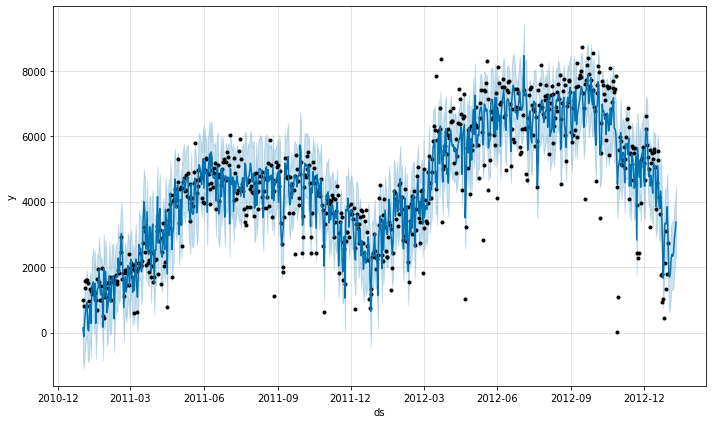

In [62]:
fig5= prophettwo.plot(forecast)
fig5.savefig('forecastskuQtyfour.png')

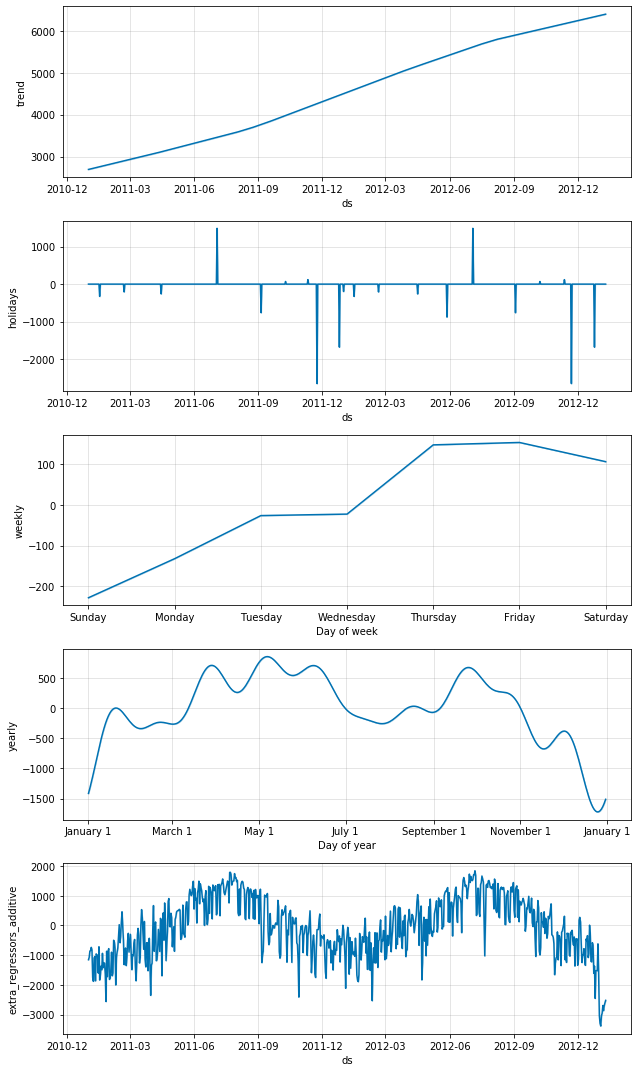

In [63]:
fig6 = prophetone.plot_components(forecast)

In [82]:
# horizon of 30 days, starting with 500 days of training data in the first cutoff and then making predictions every 90 days
df3_cv = cross_validation(prophettwo, initial='500 days',period='90days',horizon='30days')
print (df3_cv)

           ds         yhat   yhat_lower   yhat_upper     y     cutoff
0  2012-06-05  5517.531496  4667.446258  6408.276005  7001 2012-06-04
1  2012-06-06  6308.511550  5481.824924  7131.066166  7055 2012-06-04
2  2012-06-07  6701.183786  5896.666532  7531.846226  7494 2012-06-04
3  2012-06-08  6991.517939  6112.645680  7885.355821  7736 2012-06-04
4  2012-06-09  7236.119182  6395.586569  8108.042544  7498 2012-06-04
..        ...          ...          ...          ...   ...        ...
85 2012-12-27  4318.377151  3358.975201  5257.953402  2114 2012-12-01
86 2012-12-28  4331.436759  3270.036185  5323.491050  3095 2012-12-01
87 2012-12-29  4333.348769  3319.252443  5303.430665  1341 2012-12-01
88 2012-12-30  4832.556906  3862.035983  5789.820678  1796 2012-12-01
89 2012-12-31  3980.662087  3078.931310  4925.137637  2729 2012-12-01

[90 rows x 6 columns]


In [83]:
performance_metrics_results = performance_metrics(df3_cv)
print (performance_metrics_results)

   horizon           mse         rmse          mae      mape  coverage
0   3 days  4.440878e+05   666.399122   520.602228  0.076428  0.888889
1   4 days  2.528278e+05   502.819857   436.940294  0.063085  1.000000
2   5 days  1.863530e+05   431.686278   358.524869  0.051540  1.000000
3   6 days  1.337909e+05   365.774320   315.759475  0.047781  1.000000
4   7 days  3.757154e+05   612.956314   445.853009  0.064253  0.888889
5   8 days  8.344526e+05   913.483757   759.839497  0.143419  0.666667
6   9 days  9.136097e+05   955.829321   831.729725  0.150705  0.666667
7  10 days  7.464007e+05   863.944845   768.068844  0.144101  0.666667
8  11 days  4.060276e+05   637.202964   592.782808  0.086043  0.888889
9  12 days  3.962257e+05   629.464638   583.283994  0.083653  0.888889
10 13 days  5.154393e+05   717.941042   591.074221  0.079443  0.888889
11 14 days  4.877618e+05   698.399444   568.067104  0.081463  0.888889
12 15 days  5.060354e+05   711.361621   607.673363  0.099122  0.888889
13 16 

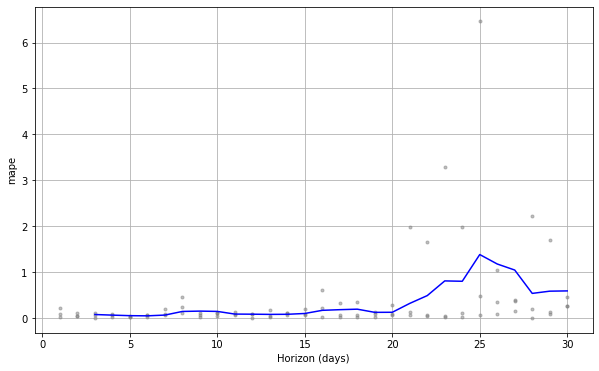

In [84]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df3_cv,metric='mape')